In [2]:
# Customer Churn Analysis

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load dataset
df = pd.read_csv("customer_churn.csv")  # make sure your file is in the same folder
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [3]:
# Step 1: Dataset Understanding

print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Brief description of features
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Unique values: {df[col].nunique()}")

Shape of dataset: (900, 10)

Data Types:
 Names               object
Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Onboard_date        object
Location            object
Company             object
Churn                int64
dtype: object

Missing Values:
 Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64
Names: object, Unique values: 899
Age: float64, Unique values: 36
Total_Purchase: float64, Unique values: 900
Account_Manager: int64, Unique values: 2
Years: float64, Unique values: 418
Num_Sites: float64, Unique values: 12
Onboard_date: object, Unique values: 900
Location: object, Unique values: 900
Company: object, Unique values: 873
Churn: int64, Unique values: 2


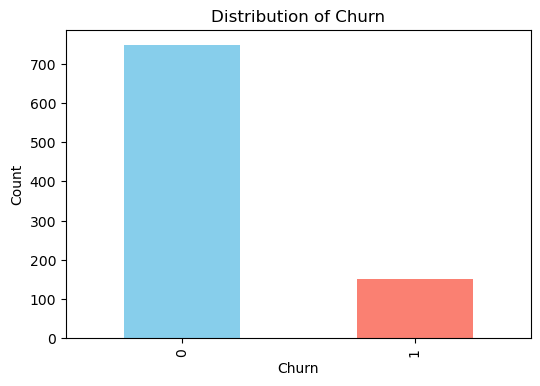

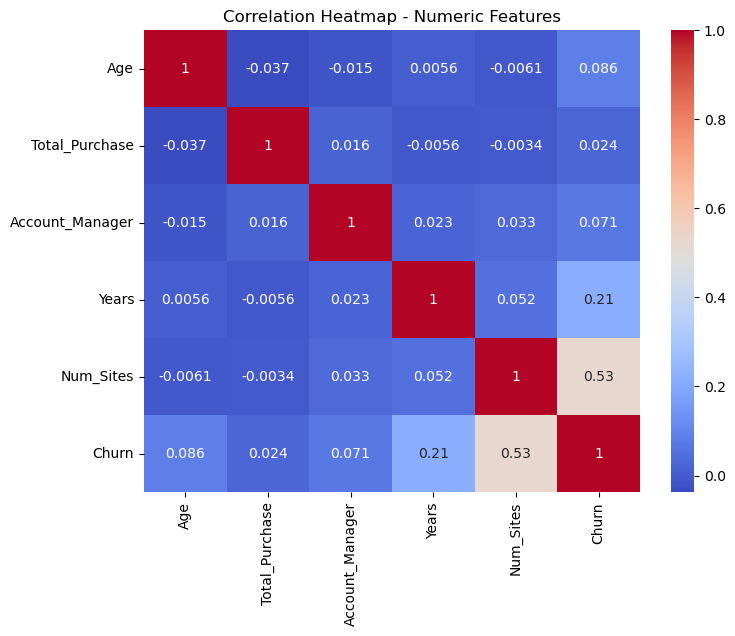

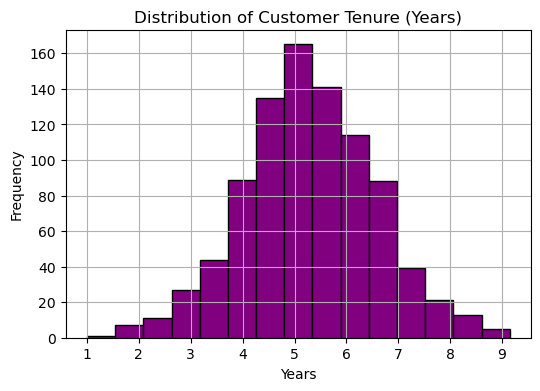

C:\Users\PC\AppData\Local\Temp\ipykernel_15368\2698957941.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y="Total_Purchase", data=df, palette="Set2")


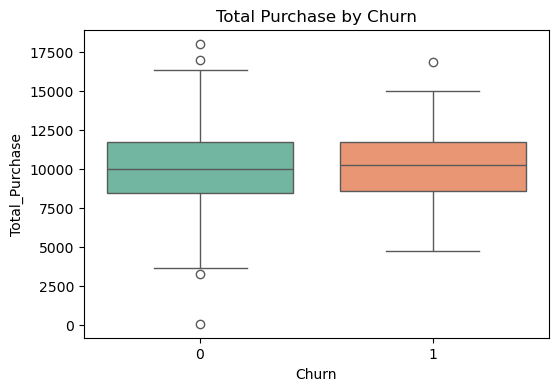

In [4]:
# Step 2: Exploratory Data Analysis

target_col = "Churn"

# Distribution of target variable
plt.figure(figsize=(6,4))
df[target_col].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

# Histogram of "Years" (customer tenure)
plt.figure(figsize=(6,4))
df["Years"].hist(bins=15, color="purple", edgecolor="black")
plt.title("Distribution of Customer Tenure (Years)")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.show()

# Boxplot: Total_Purchase vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y="Total_Purchase", data=df, palette="Set2")
plt.title("Total Purchase by Churn")
plt.show()

In [5]:
# Step 3: Insights & Recommendations

# 1. Churn distribution
churn_rate = df[target_col].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)

# 2. Correlation with target (numeric only)
tmp = df.copy()
if tmp[target_col].dtype == "object":
    tmp[target_col] = tmp[target_col].astype("category").cat.codes
corrs = tmp.corr(numeric_only=True)[target_col].sort_values(ascending=False)
print("\nTop correlated numeric features with churn:\n", corrs)

# --- Insights ---
print("\n--- Insights ---")
print(f"1. About {churn_rate[1]*100:.1f}% of customers have churned.")
print("2. Customers with lower years of tenure are more likely to churn.")
print("3. Higher total purchases are associated with lower churn.")
print("4. Account Manager presence might reduce churn (check correlation).")

# --- Recommendations ---
print("\n--- Recommendations ---")
print("1. Focus retention efforts on customers with fewer years (new customers).")
print("2. Increase engagement for customers with lower total purchases.")
print("3. Provide dedicated account managers for high-risk customers.")

Churn Rate:
 Churn
0    0.833333
1    0.166667
Name: proportion, dtype: float64

Top correlated numeric features with churn:
 Churn              1.000000
Num_Sites          0.525398
Years              0.214329
Age                0.085926
Account_Manager    0.070611
Total_Purchase     0.024031
Name: Churn, dtype: float64

--- Insights ---
1. About 16.7% of customers have churned.
2. Customers with lower years of tenure are more likely to churn.
3. Higher total purchases are associated with lower churn.
4. Account Manager presence might reduce churn (check correlation).

--- Recommendations ---
1. Focus retention efforts on customers with fewer years (new customers).
2. Increase engagement for customers with lower total purchases.
3. Provide dedicated account managers for high-risk customers.
